In [155]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
ride_all_df=pd.merge(ride_df, city_df, how='inner', on='city')
# Combine the data into a single dataset
ride_df= ride_df.drop_duplicates("city",keep="first")
city_ride_df = pd.merge(ride_df, city_df, how='outer', on='city')
# Display the data table for preview
#city_ride_df.to_csv("check1.csv",header=True, index=False)
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [156]:
summary_df=ride_all_df.groupby(["type","city"],as_index=False).agg({'ride_id':'count', 'fare':'mean','driver_count':'first'})
#summary_df=ride_all_df.groupby(["city"]).agg({'ride_id':'count', 'fare':'mean','driver_count':'first'})
##check or testing with the droped dup
#summary_df=city_ride_df.groupby(["type","city"]).agg({'ride_id':'count', 'fare':'mean','driver_count':'first'})
#summary_df1=pd.DataFrame(summary_df)
summary_df=summary_df.set_index('type')
summary_df.head()

#ride_all_df.head()

,city,ride_id,fare,driver_count
type,,,,
Rural,Bradshawfurt,10,40.064000,7
Rural,Garzaport,3,24.123333,7
Rural,Harringtonfort,6,33.470000,4
Rural,Jessicaport,6,36.013333,1
Rural,Lake Jamie,6,34.358333,4


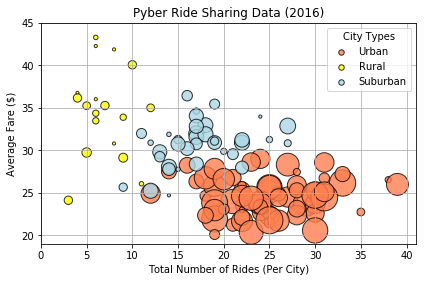

In [183]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


urban_fr = summary_df.loc["Urban",["city","ride_id","fare","driver_count"]]
urban_fr.head()
x_urb_axis=[ride for ride in urban_fr["ride_id"]]
y_urb_fare_df =[fare for fare in urban_fr["fare"]]



rural_fr = summary_df.loc["Rural",["city","ride_id","fare","driver_count"]]
rural_fr.head()
x_rur_axis=[ride for ride in rural_fr["ride_id"]]
y_rur_fare_df =[fare for fare in rural_fr["fare"]]



sub_fr = summary_df.loc["Suburban",["city","ride_id","fare","driver_count"]]
sub_fr.head()
x_sub_axis=[ride for ride in sub_fr["ride_id"]]
y_sub_fare_df =[fare for fare in sub_fr["fare"]]




#plt.figure(figsize=(7,7))
plt.xlim(0,41)
plt.ylim(19,45)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.scatter(x_urb_axis, y_urb_fare_df,marker="o", alpha=.8,linewidths=1, color="coral",s=10*urban_fr["driver_count"], edgecolors='black',label="Urban")
plt.scatter(x_rur_axis, y_rur_fare_df,marker="o", alpha=.8,linewidths=1, color="yellow",s=10*rural_fr["driver_count"], edgecolors='black',label="Rural")
plt.scatter(x_sub_axis, y_sub_df,marker="o", alpha=.8, linewidths=1,color="lightblue",s=10*sub_fr["driver_count"], edgecolors='black',label="Suburban")


plt.grid()



lgnd=plt.legend(loc='upper right',markerscale=.5,title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.tight_layout(True)
plt.savefig("pyberridesharing.png")










## Bubble Plot of Ride Sharing Data

In [159]:
# Show plot
plt.show()

## Total Fares by City Type

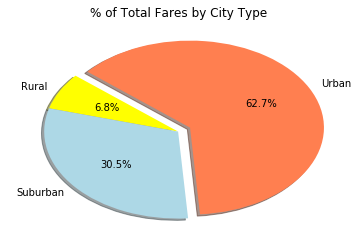

In [188]:
# Calculate Type Percents
ride_all_df.head()
summary_df1=ride_all_df.groupby(["type"],as_index=False).agg({'ride_id':'count', 'fare':'sum'})#,'driver_count':'first'})


net_fare=summary_df1["fare"].sum()

summary_df1["percentage"]=round((summary_df1["fare"]/net_fare)*100,1)


type_slice=[type for type in summary_df1["type"]]
per_slice=[per for per in summary_df1["percentage"]]
colors = ["yellow","lightblue","coral"]
explode = (0,0,0.1)

plt.pie(per_slice, explode=explode, labels=type_slice, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
#summary_df1.head()

# Build Pie Chart

# Save Figure
plt.savefig("pyberpercentageoffaresbyregion.png")

In [161]:
# Show Figure
plt.show()

## Total Rides by City Type

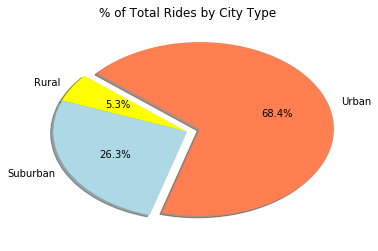

In [200]:
summary_df1.head()
# Calculate Ride Percents



net_rides=summary_df1["ride_id"].sum()

summary_df1["percentage_rides"]=round((summary_df1["ride_id"]/net_rides)*100,1)


type_slice=[type for type in summary_df1["type"]]
per_slice=[per for per in summary_df1["percentage_rides"]]
colors = ["yellow","lightblue","coral"]
explode = (0,0,0.1)

plt.pie(per_slice, explode=explode, labels=type_slice, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
#summary_df1.head()

# Build Pie Chart

# Save Figure
plt.savefig("pyberpercentageofridesbyregion.png")


# Build Pie Chart

# Save Figure


In [163]:
# Show Figure
plt.show()

## Total Drivers by City Type

,type,driver_count,percentage_drivers
0,Rural,78,2.6
1,Suburban,490,16.5
2,Urban,2405,80.9


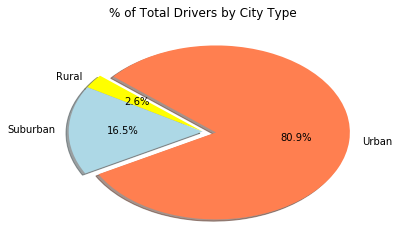

In [199]:
summary_df2=city_df.groupby(["type"],as_index=False).agg({'driver_count':'sum'})




net_drivers=summary_df2["driver_count"].sum()

summary_df2["percentage_drivers"]=round((summary_df2["driver_count"]/net_drivers)*100,1)


type_slice=[type for type in summary_df2["type"]]
per_slice=[per for per in summary_df2["percentage_drivers"]]
colors = ["yellow","lightblue","coral"]
explode = (0,0,0.1)

plt.pie(per_slice, explode=explode, labels=type_slice, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
#summary_df1.head()

# Build Pie Chart

# Save Figure
plt.savefig("pyberpercentageofdriversbyregion.png")
# Calculate Driver Percents

# Build Pie Charts

# Save Figure
summary_df2.head()

In [165]:
# Show Figure
plt.show()